# importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import numpy as np

# EDA

In [2]:
data = pd.read_table('data/healthcare-dataset-stroke-data.csv',sep=',')

In [3]:
data.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [4]:
data.shape

(5110, 12)

In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Missing Values

In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data = data.fillna(data["bmi"].median())

Pivot tables

In [8]:
def pivot(data,values,index,color):
    pivot_table=pd.pivot_table(data, values=values, 
                             index=index,
                             aggfunc='count')
    pivot_table = pivot_table.style.background_gradient(sns.light_palette(color, as_cmap=True))
    return pivot_table

In [9]:
gender_status= pivot(data,'stroke',['gender', 'ever_married'],'red')
gender_status

In [10]:
data=data[data.gender!='Other']
gender_status= pivot(data,'stroke',['gender', 'ever_married'],'red')
gender_status

In [11]:
gender_tension=pivot(data,'stroke',['gender', 'hypertension'],'green')
gender_tension

In [12]:
gender_work=pivot(data,'stroke',['gender', 'work_type'],'yellow')
gender_work

In [13]:
gender_smoke=pivot(data,'stroke',['gender', 'smoking_status'],'darkblue')
gender_smoke

In [14]:
gender_residence=pivot(data,'stroke',['gender', 'Residence_type'],'purple')
gender_residence

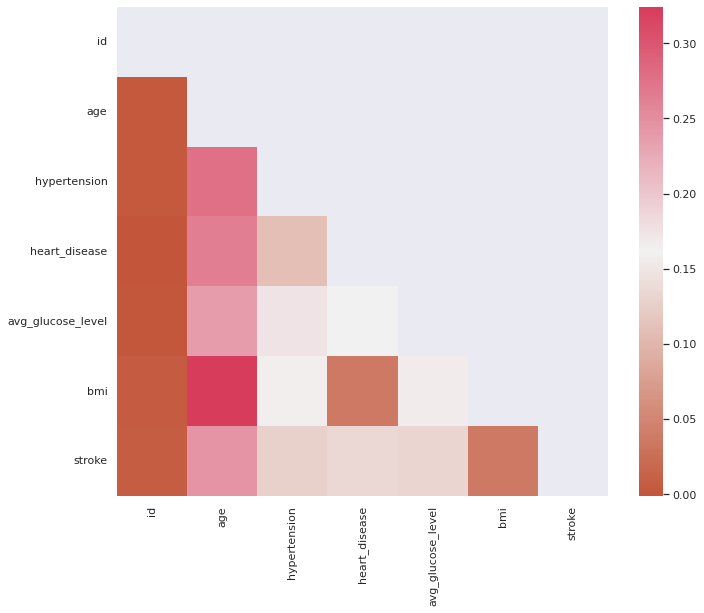

In [15]:
correlation = data.corr()
def heatmap(corr_matrix):
    sns.set(style="dark")
    f, ax = plt.subplots(figsize=(11, 9))
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(20, 5, as_cmap=True)
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, ax=ax)
heatmap(correlation)

# Outliers 

In [16]:
def box_plot(data,x,y):
    f, ax = plt.subplots(figsize=(6.5, 6.5))
    sns.boxplot(x=x, y=y,
                data=data, ax=ax)

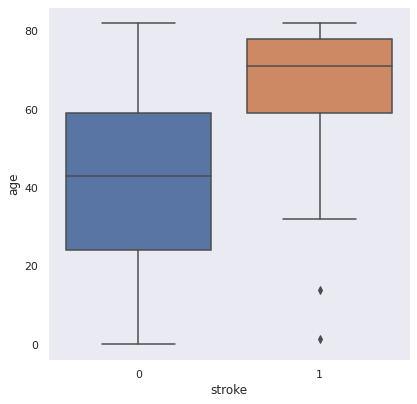

In [17]:
box_plot(data,"stroke","age")

In [18]:
def zscore(data):
    global outliers
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [19]:
age_outliers=zscore(data['age'])
print("We have {} outliers in age column".format(len(age_outliers)))

We have 0 outliers in age column


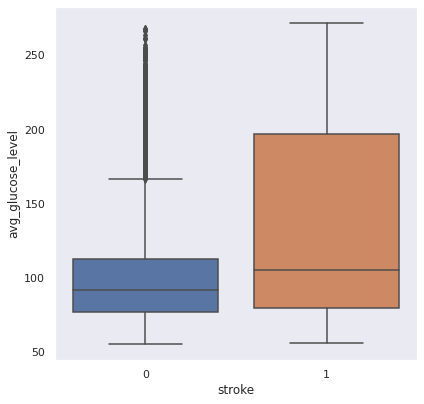

In [20]:
box_plot(data,"stroke","avg_glucose_level")

In [21]:
avg_glucose_level_outliers = zscore(data['avg_glucose_level'])
print("We have {} outliers in avg_glucose_level column".format(len(avg_glucose_level_outliers)))

We have 49 outliers in avg_glucose_level column


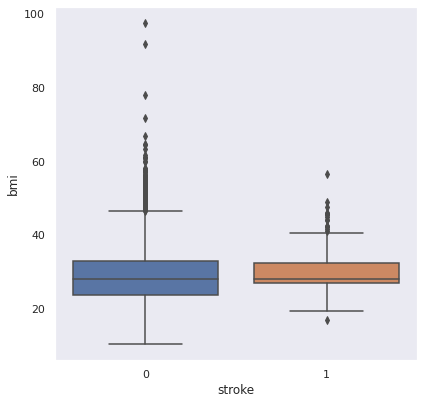

In [22]:
box_plot(data,"stroke","bmi")

In [23]:
bmi_outliers = zscore(data['bmi'])
print("We have {} outliers in bmi column".format(len(bmi_outliers)))

We have 59 outliers in bmi column


In [24]:
def outlier_imputation(data,outliers):
    median = np.median(data)
    c=[]
    for i in outliers:
        c.append(np.where(data==i, median, data))
    print(c)
        

In [25]:
np.median(data['avg_glucose_level'])

91.88

In [26]:
outlier_imputation(data['bmi'],bmi_outliers)
outlier_imputation(data['age'],age_outliers)
outlier_imputation(data['avg_glucose_level'],avg_glucose_level_outliers)

[array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]), array([36.6, 28.1, 32.5, ..., 30.6, 25.6, 26.2]),

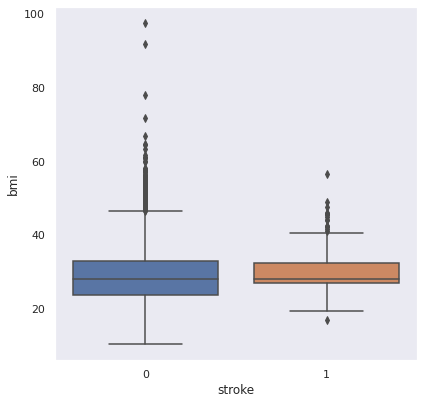

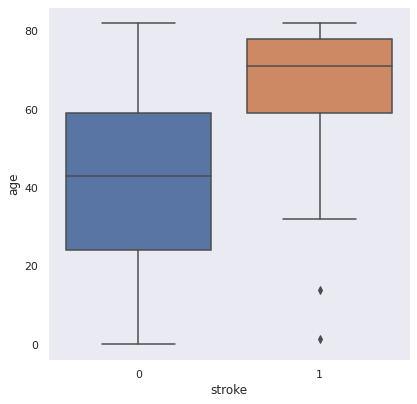

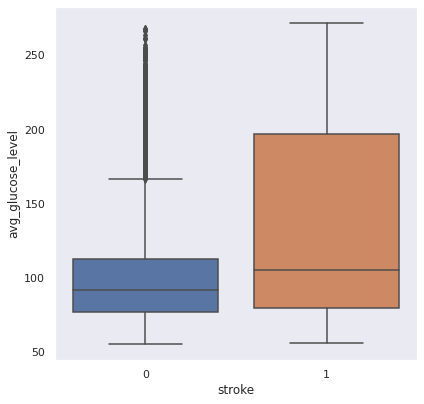

In [27]:
box_plot(data,"stroke","bmi")
box_plot(data,"stroke","age")
box_plot(data,"stroke","avg_glucose_level")

In [28]:
ninetieth_percentile = np.percentile(data['age'], 90)

In [29]:
np.where(data['age'].values>ninetieth_percentile)

(array([   2,    4,    5,    9,   10,   13,   14,   22,   23,   25,   32,
          33,   35,   40,   42,   45,   48,   50,   51,   52,   53,   56,
          57,   61,   65,   67,   69,   70,   75,   76,   77,   82,   90,
          91,   93,   95,  101,  103,  108,  110,  111,  112,  119,  122,
         126,  127,  128,  131,  136,  137,  138,  140,  147,  150,  152,
         155,  159,  160,  163,  165,  167,  168,  169,  171,  173,  174,
         176,  177,  178,  179,  183,  187,  188,  198,  201,  202,  203,
         205,  206,  207,  208,  214,  215,  216,  218,  220,  221,  223,
         226,  229,  230,  231,  233,  234,  237,  248,  259,  260,  268,
         301,  311,  314,  325,  330,  331,  337,  350,  360,  362,  405,
         409,  463,  475,  482,  504,  549,  551,  568,  613,  621,  643,
         653,  659,  661,  666,  670,  700,  710,  712,  720,  738,  752,
         767,  801,  802,  867,  874,  890,  894,  918,  930,  942,  992,
        1002, 1013, 1017, 1029, 1042, 